In [1]:
DATA_DIR = '/datasets/kaggle/planet/'
OUT_DIR = './out'

In [2]:
%run 'Lib.ipynb'

In [3]:
train_df = pd.read_csv(DATA_DIR + '/train_v2.csv')
train_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
# add weather column

weather_tags = ['clear', 'cloudy', 'haze', 'partly_cloudy']
weather_col = []
no_weather_col = []

for tags in train_df['tags'].values:
    weather_tag_found = False
    no_weather_tags = []

    for tag in tags.split(' '):
        
        if tag in weather_tags:
            assert(weather_tag_found == False)
            weather_col.append([tag])
            weather_tag_found = True
        else:
            no_weather_tags.append(tag)
       
    if weather_tag_found == False: 
        weather_col.append(['unknown'])
        print(tags)
        
    no_weather_col.append(no_weather_tags)

water


In [5]:
assert(len(weather_col) == len(train_df.values))

In [6]:
train_df[train_df['tags'] == 'water']

,image_name,tags
24448,train_24448,water


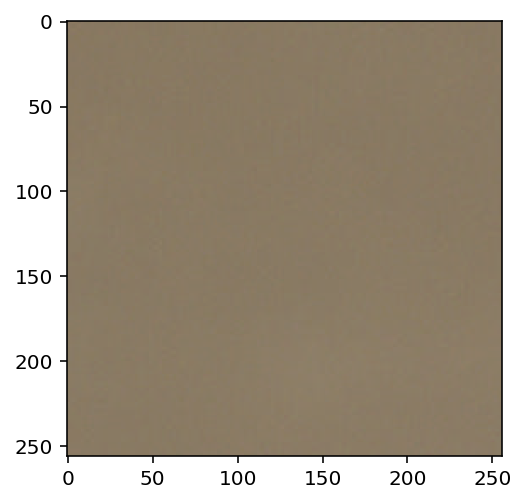

In [7]:
plt.imshow(plt.imread('/datasets/kaggle/planet/train-jpg/train_24448.jpg'))

In [8]:
train_df['weather'] = weather_col
train_df['tags_other'] = no_weather_col

In [9]:
train_df.head()

,image_name,tags,weather,tags_other
0,train_0,haze primary,[haze],[primary]
1,train_1,agriculture clear primary water,[clear],"[agriculture, primary, water]"
2,train_2,clear primary,[clear],[primary]
3,train_3,clear primary,[clear],[primary]
4,train_4,agriculture clear habitation primary road,[clear],"[agriculture, habitation, primary, road]"


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
m = MultiLabelBinarizer()
v = m.fit_transform(train_df['weather'])

print('Weather classes:', m.classes_)

weather_classes = m.classes_

train_df['weather_binarized'] = pd.Series(v.tolist())
train_df.head()

Weather classes: ['clear' 'cloudy' 'haze' 'partly_cloudy' 'unknown']


,image_name,tags,weather,tags_other,weather_binarized
0,train_0,haze primary,[haze],[primary],"[0, 0, 1, 0, 0]"
1,train_1,agriculture clear primary water,[clear],"[agriculture, primary, water]","[1, 0, 0, 0, 0]"
2,train_2,clear primary,[clear],[primary],"[1, 0, 0, 0, 0]"
3,train_3,clear primary,[clear],[primary],"[1, 0, 0, 0, 0]"
4,train_4,agriculture clear habitation primary road,[clear],"[agriculture, habitation, primary, road]","[1, 0, 0, 0, 0]"


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
m = MultiLabelBinarizer()
v = m.fit_transform(train_df['tags_other'])

print('Misc Classes:', m.classes_)

misc_classes = m.classes_

train_df['tags_other_binarized'] = pd.Series(v.tolist())
train_df.head()

Misc Classes: ['agriculture' 'artisinal_mine' 'bare_ground' 'blooming' 'blow_down'
 'conventional_mine' 'cultivation' 'habitation' 'primary' 'road'
 'selective_logging' 'slash_burn' 'water']


,image_name,tags,weather,tags_other,weather_binarized,tags_other_binarized
0,train_0,haze primary,[haze],[primary],"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,train_1,agriculture clear primary water,[clear],"[agriculture, primary, water]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]"
2,train_2,clear primary,[clear],[primary],"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,train_3,clear primary,[clear],[primary],"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,train_4,agriculture clear habitation primary road,[clear],"[agriculture, habitation, primary, road]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]"


In [ ]:
# save csv
train_df.to_csv(OUT_DIR + '/train_v2_processed.csv', index=False)

In [30]:
# save classes
np.save(OUT_DIR + '/classes_misc.npy', misc_classes)
np.save(OUT_DIR + '/classes_weather.npy', weather_classes)

## Reading

In [50]:
r = pd.read_csv(OUT_DIR + '/train_v2_processed.csv', index_col=None); r.head()

,image_name,tags,weather,tags_other,weather_binarized,tags_other_binarized
0,train_0,haze primary,['haze'],['primary'],"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,train_1,agriculture clear primary water,['clear'],"['agriculture', 'primary', 'water']","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]"
2,train_2,clear primary,['clear'],['primary'],"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,train_3,clear primary,['clear'],['primary'],"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,train_4,agriculture clear habitation primary road,['clear'],"['agriculture', 'habitation', 'primary', 'road']","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]"


In [51]:
r['weather_binarized'] = [eval(x) for x in r['weather_binarized']]
r['tags_other_binarized'] = [eval(x) for x in r['tags_other_binarized']]

In [52]:
del r['tags']
del r['tags_other']
del r['weather']

In [53]:
r.head()

,image_name,weather_binarized,tags_other_binarized
0,train_0,"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,train_1,"[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]"
2,train_2,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,train_3,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,train_4,"[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]"


In [63]:
Y_tags_misc = np.array(r['tags_other_binarized'].values.tolist(), dtype=np.float32)
np.save(OUT_DIR + '/Y_tags_misc.npy', Y_tags_misc)
Y_tags_misc.shape

(40479, 13)

In [64]:
Y_tags_weather = np.array(r['weather_binarized'].values.tolist(), dtype=np.float32)
np.save(OUT_DIR + '/Y_tags_weather.npy', Y_tags_weather)
Y_tags_weather.shape

(40479, 5)

In [66]:
X_files = np.array(r['image_name'].values.tolist())
np.save(OUT_DIR + '/X_files.npy', X_files)
X_files

array(['train_0', 'train_1', 'train_2', ..., 'train_40476', 'train_40477',
       'train_40478'],
      dtype='<U11')